# Regressionproblem - Example
In this script we demonstrate how a Machine Learning workflow can look like when you use cross validation on the train set to choose model and then evaluate the chosen models generalization error on the test set. 

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

# Loading Data

In [3]:
# This code is merely executed to see the description of the data in a smooth way
data = load_diabetes()

In [4]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

## Storing/Loading the data in the way it will be used

In [5]:
X, y = load_diabetes(return_X_y=True, as_frame=True)

In [6]:
print(X.info())
print()
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
None

<class 'pandas.core.series.Series'>
RangeIndex: 442 entries, 0 to 441
Series name: target
Non-Null Count  Dtype  
--------------  -----  
442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB
None


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# EDA

<Axes: >

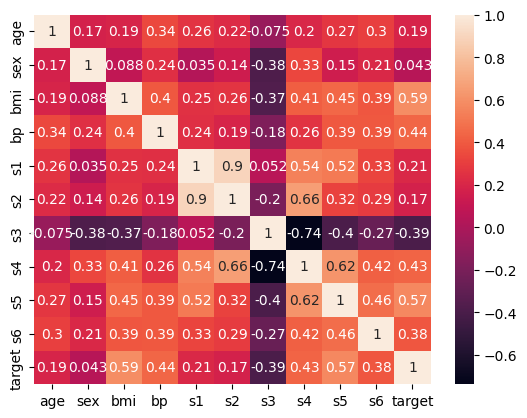

In [8]:
# Placing all the data in "df" so I can make a nice correlation plot
df = X.copy()
df['target'] = y

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

Text(0, 0.5, 'Disease Progression')

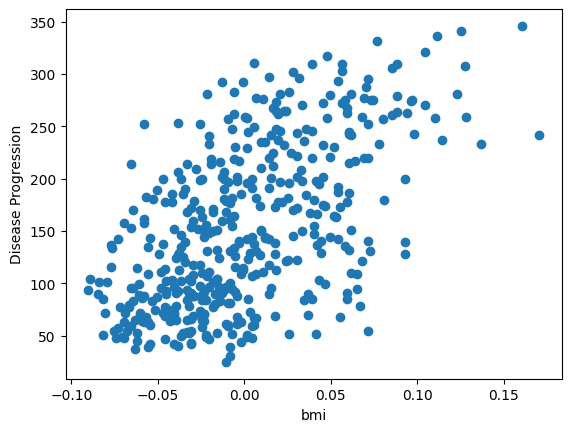

In [9]:
# Intuitive (and from the correlation plot), therese should be a positive relationship 
# between the target (disease progression) and BMI.
plt.scatter(df["bmi"], df["target"])
plt.xlabel("bmi")
plt.ylabel("Disease Progression")

In [10]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078
66,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633
137,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504
245,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499


In [11]:
X_train.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,0.001442,0.000184,0.001736,0.001179,-0.000556,-0.000806,-0.000989,0.000377,0.001216,0.001891
std,0.046334,0.047644,0.047275,0.048469,0.047786,0.047631,0.047044,0.047790,0.047828,0.048380
min,-0.107226,-0.044642,-0.089197,-0.112399,-0.108893,-0.115613,-0.102307,-0.076395,-0.126097,-0.137767
25%,-0.030942,-0.044642,-0.032073,-0.036656,-0.035968,-0.032629,-0.032356,-0.039493,-0.033246,-0.030072
50%,0.009016,-0.044642,-0.005128,-0.005670,-0.004321,-0.004132,-0.006584,-0.002592,-0.000612,0.003064
75%,0.038076,0.050680,0.032595,0.035644,0.025950,0.027183,0.026550,0.034309,0.033654,0.032059
max,0.110727,0.050680,0.160855,0.132044,0.153914,0.198788,0.181179,0.185234,0.133597,0.135612


In [12]:
y_train.head()

17     144.0
66     150.0
137    280.0
245    125.0
31      59.0
Name: target, dtype: float64

In [13]:
y_train.describe()

count    353.000000
mean     153.736544
std       78.061902
min       25.000000
25%       86.000000
50%      142.000000
75%      214.000000
max      346.000000
Name: target, dtype: float64

# Creating 3 different models and choosing the best one with Cross Validation. 

In [22]:
lin_reg = LinearRegression()

# In Scikit-learn, higher score is better. Since a low MSE is better than a high,
# we use negative mean squared error to respect the rule "higher is better".
scores_lr = cross_validate(lin_reg, X_train, y_train, cv=3, scoring = 'neg_mean_squared_error')["test_score"]
print('RMSE for each iteration:', np.sqrt(-scores_lr))
print('RMSE:', np.sqrt(np.mean(-scores_lr)))

RMSE for each iteration: [53.31283683 53.16309571 59.79731897]
RMSE: 55.510637635268864


In [15]:
lasso = Lasso()
hyper_param_lasso = {'alpha':(0.01, 1, 2, 5, 10)}
lasso_reg = GridSearchCV(lasso, hyper_param_lasso, cv = 5)
# Fit the gridsearch to use the best hyperparameter in our cross validation
lasso_reg.fit(X_train, y_train)

print(lasso_reg.best_params_)

scores_lasso = cross_validate(lasso_reg, X_train, y_train, cv=3, scoring = 'neg_mean_squared_error')["test_score"]
print('RMSE for each iteration:', np.sqrt(-scores_lasso))
print('RMSE:', np.sqrt(np.mean(-scores_lasso)))

{'alpha': 0.01}
RMSE for each iteration: [53.64040125 53.57666852 59.49674471]
RMSE: 55.64055681258611


In [16]:
forest = RandomForestRegressor()
param_grid = { 
    'n_estimators': [10, 100, 120],
    'max_depth' : [None, 10],
}
forest_reg = GridSearchCV(forest, param_grid=param_grid, cv= 5)
# Fit the gridsearch to use the best hyperparameter in our cross validation
forest_reg.fit(X_train, y_train)

print(forest_reg.best_params_)

scores_forest = cross_validate(forest_reg, X_train, y_train, cv=3, scoring = 'neg_mean_squared_error')["test_score"]
print('RMSE for each iteration:', np.sqrt(-scores_forest))
print('RMSE:', np.sqrt(np.mean(-scores_forest)))

{'max_depth': 10, 'n_estimators': 100}
RMSE for each iteration: [56.40337524 63.01228359 58.73538738]
RMSE: 59.4467110134847


The Linear Regression modell had lowest RMSE and hence we choose that one as our model. 

In [23]:
lin_reg.fit(X_train, y_train)

LinearRegression()

# Evaluating the chosen model on the test set

In [24]:
# Calculating the mean value of the y_test data. We will put this in relation to the RMSE that we soon calculate.
print(np.mean(y_test))

145.77528089887642


<Axes: >

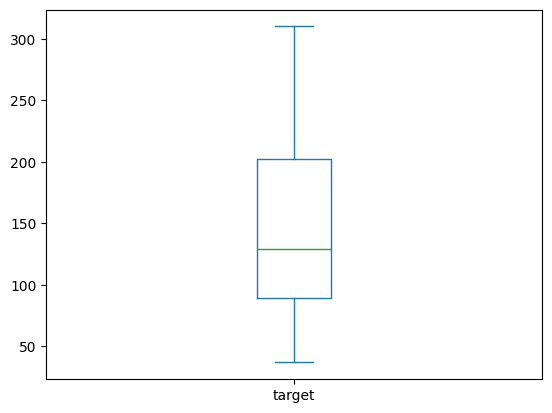

In [25]:
y_test.plot.box()

In [27]:
y_test_pred_lr = lin_reg.predict(X_test)
RMSE_test_data = root_mean_squared_error(y_test, y_test_pred_lr)
print(RMSE_test_data)

53.85344583676593


In [28]:
# Our error on the test data is about 37% in relation to the mean value of the test data. 
(RMSE_test_data)/(np.mean(y_test))

np.float64(0.3694278310060249)